## Data Exploration



In [132]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [133]:
import sys
from time import time
import matplotlib as pl
import matplotlib.pyplot as plt
import pickle

In [134]:
dataPath = '/Users/omojumiller/mycode/MachineLearningNanoDegree/IntroToMachineLearning/'
sys.path.append(dataPath+'tools/')
sys.path.append(dataPath+'final_project/')

from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data
from helper_files import compareTwoFeatures, computeFraction

In [135]:
### Load the dictionary containing the dataset

with open(dataPath+'final_project/final_project_dataset.pkl', "r") as data_file:
    data_dict = pickle.load(data_file)

In [136]:
len(data_dict)

146

If there are outliers, remove outliers

This is an iteratable process. I need to do this for each combination of features I want to use


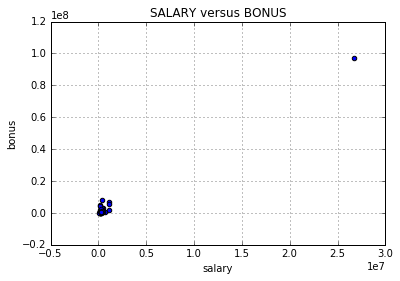

In [180]:
data = compareTwoFeatures('salary', 'bonus', data_dict, "SALARY versus BONUS")

1. I need to find out where that outlier is
2. Find out who it is

In [181]:
np.where(data > 0.8 * 1e8) # This is where the outlier is, what I have to do now is find out who it is


(array([57]), array([1]))

In [182]:
data[57] # So whose bonus is 97343619?
# What’s the name of the dictionary key of this data point?

array([ 26704229.,  97343619.])

In [183]:
for key, value in data_dict.iteritems():
    if (value['bonus'] >= int(data[57][1]) and 
        value['bonus'] != "NaN" and
        value['salary'] != "NaN"):
        print "{:20}{:12}${:<12,.2f}{:12}${:<12,.2f}".format(key, 'salary is ', value['salary'],
                                                   ' bonus ', value['bonus'])
        
    if (value['restricted_stock'] < 0):
        print key



TOTAL               salary is   $26,704,229.00 bonus      $97,343,619.00
BHATNAGAR SANJAY


Found the source of the outlier. It was the `TOTAL` row that was mistakenly read into the data dict

In [184]:
# Remove the source of the outlier
data_dict.pop( 'TOTAL')
data_dict.pop( 'BHATNAGAR SANJAY')

# We can now go back and rerun the regression to see what the data really looks like.

{'bonus': 'NaN',
 'deferral_payments': 'NaN',
 'deferred_income': 'NaN',
 'director_fees': 137864,
 'email_address': 'sanjay.bhatnagar@enron.com',
 'exercised_stock_options': 2604490,
 'expenses': 'NaN',
 'from_messages': 29,
 'from_poi_to_this_person': 0,
 'from_this_person_to_poi': 1,
 'loan_advances': 'NaN',
 'long_term_incentive': 'NaN',
 'other': 137864,
 'poi': False,
 'restricted_stock': -2604490,
 'restricted_stock_deferred': 15456290,
 'salary': 'NaN',
 'shared_receipt_with_poi': 463,
 'to_messages': 523,
 'total_payments': 15456290,
 'total_stock_value': 'NaN'}

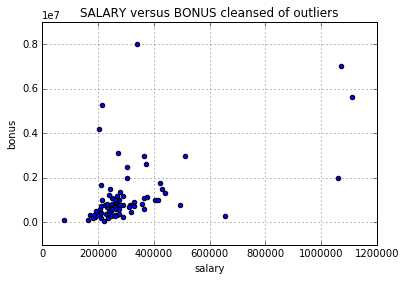

In [185]:
data = compareTwoFeatures('salary', 'bonus', data_dict, "SALARY versus BONUS cleansed of outliers")

slope of regression is 0.39
intercepts of regression is 308689.49

 ********stats on dataset********

r-squared score on testing data:  -0.586927254594
r-squared score on training data:  0.539033404275


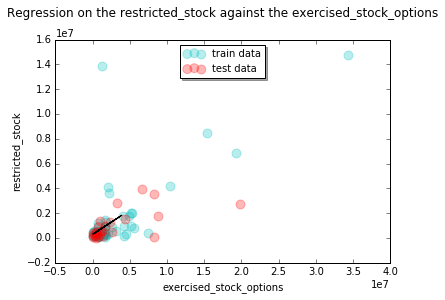

In [211]:
features_list = ['restricted_stock', 'exercised_stock_options'] #
data = featureFormat( data_dict, features_list, remove_any_zeroes=True)
target, features = targetFeatureSplit( data )


### training-testing split needed in regression, just like classification
from sklearn.cross_validation import train_test_split
feature_train, feature_test, target_train, target_test = train_test_split(features, 
                                            target, test_size=0.3, random_state=42)


import numpy as np
target_test = np.asarray(target_test).reshape(-1,1)

from sklearn import linear_model
reg = linear_model.LinearRegression()
    
# Reshape data using X.reshape(-1, 1) since data has a single feature or X.
clf = reg.fit(feature_train, target_train)


print "slope of regression is %.2f" % reg.coef_
print "intercepts of regression is %.2f" % reg.intercept_
print "\n ********stats on dataset********\n"
print "r-squared score on testing data: ", reg.score(feature_test, target_test)
print "r-squared score on training data: ", reg.score(feature_train, target_train)

plt.clf()
plt.scatter(feature_train, target_train, color="c", label="train data", s=80, marker = 'o', alpha = 0.28)
plt.scatter(feature_test, target_test, color="r", label="test data", s=80, marker = 'o', alpha = 0.28)

plt.plot(target_test, reg.predict(target_test), color="k")
plt.legend(loc='upper center', shadow=True, fontsize='medium')
plt.ylabel(features_list[0])
plt.xlabel(features_list[1])
plt.title('Regression on the '+features_list[0]+' against the '+features_list[1], y=1.08)
plt.show()

## Task 6: Export data 
Dump  dataset to a .pkl file.

In [192]:
DATASET_PICKLE_FILENAME = "cleaned_dataset.pkl"

with open(DATASET_PICKLE_FILENAME, "w") as dataset_outfile:
    pickle.dump(data_dict, dataset_outfile)
   